In [1]:
import fiftyone as fo
import fiftyone.zoo as foz

classes = ['person', 'car', 'stop sign', 'truck', 'traffic light', 'motorcycle']
label_types = ["detections", "segmentations"]

train_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=label_types,
    classes=classes,
    max_samples=2000,  
)

validation_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=label_types,
    classes=classes,
    max_samples=2000,  


Found annotations at 'C:\Users\salaw\fiftyone\coco-2017\raw\instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-train-2000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Found annotations at 'C:\Users\salaw\fiftyone\coco-2017\raw\instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-2000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [2]:
import os
from pycocotools.coco import COCO

def coco_to_yolo(coco_annotation_path, output_folder, classes):
    coco = COCO(coco_annotation_path)
    image_ids = coco.getImgIds()
    cat_ids = coco.getCatIds(catNms=classes) 
    cat_mapping = {cat_id: i for i, cat_id in enumerate(cat_ids)}

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_id in image_ids:
        img = coco.loadImgs(image_id)[0]
        ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(ann_ids)
        filename = os.path.splitext(img['file_name'])[0] + '.txt'
        with open(os.path.join(output_folder, filename), 'w') as file:
            for ann in anns:
                cat_id = ann['category_id']
                bbox = ann['bbox']
                x_center, y_center = (bbox[0] + bbox[2] / 2) / img['width'], (bbox[1] + bbox[3] / 2) / img['height']
                width, height = bbox[2] / img['width'], bbox[3] / img['height']
                file.write(f'{cat_mapping[cat_id]} {x_center} {y_center} {width} {height}\n')

classes = ["person", "car", "truck", "traffic light", "stop sign", "motorcycle"]

train_annotations_path = r"C:\Users\salaw\fiftyone\coco-2017\train\labels.json"
train_output_folder = r"C:\Users\salaw\fiftyone\coco-2017\train\yolo_labels"

validation_annotations_path = r"C:\Users\salaw\fiftyone\coco-2017\validation\labels.json"
validation_output_folder = r"C:\Users\salaw\fiftyone\coco-2017\validation\yolo_labels"


coco_to_yolo(train_annotations_path, train_output_folder, classes)
coco_to_yolo(validation_annotations_path, validation_output_folder, classes)



loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


Following below are to get the YOLOv5 git clone
Next is to install the requirments for YOLOv5
Finally to train the model  and then run the video with the trained model

In [ ]:

git clone https://github.com/ultralytics/yolov5.git
cd yolov5
pip install -r requirements.txt



In [ ]:
python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache

In [ ]:
python detect.py --weights "runs/train/exp10/weights/best.pt" --img 640 --conf 0.25 --source "C:/Users/salaw/Documents/SChool/AI Master Winter 2024/finally/Traffic.mp4" --view-img

In [ ]:
python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache --hyp hyp.yaml


In [ ]:
python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache --cos-lr


In [ ]:
import subprocess

data_path = r'C:\Users\salaw\Documents\SChool\AI Master Winter 2024\finally\yolov5\data.yaml'

configs = [
    {'lr': 0.01, 'batch_size': 16, 'epochs': 50, 'model': 'yolov5s', 'data_path': data_path},
    {'lr': 0.001, 'batch_size': 16, 'epochs': 50, 'model': 'yolov5s', 'data_path': data_path},
    {'lr': 0.0001, 'batch_size': 16, 'epochs': 50, 'model': 'yolov5s', 'data_path': data_path}
]


def run_training(config):
    print(f"Training with LR={config['lr']} Batch size={config['batch_size']} Epochs={config['epochs']}")
    
    train_script_path = r'C:\Users\salaw\Documents\SChool\AI Master Winter 2024\finally\yolov5\train.py'
    command = [
        'python', train_script_path,
        '--img', '640',
        '--batch', str(config['batch_size']),
        '--epochs', str(config['epochs']),
        '--data', config['data_path'],
        '--weights', f"{config['model']}.pt",
        '--cache',
        '--hyp', 'hyp.yaml'  
    ]

    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, encoding='utf-8')


 
    return result.stdout, result.stderr


for config in configs:
    stdout, stderr = run_training(config)
    print("Training Output:")
    print(stdout)
    if stderr:
        print("Errors/Warnings:")
        print(stderr)
    print("============================================")



Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')


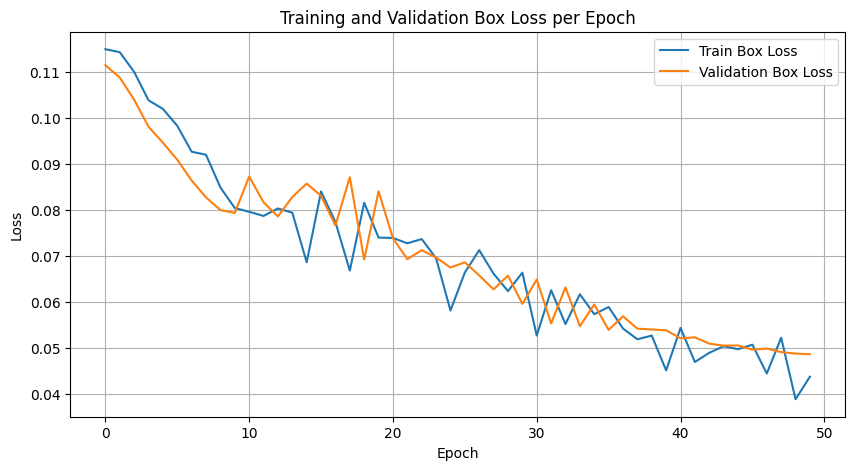

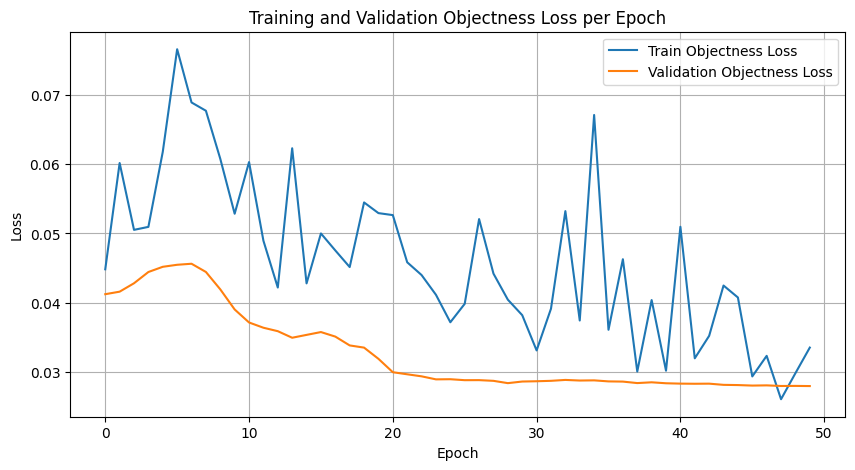

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\salaw\Documents\SChool\AI Master Winter 2024\finally\yolov5\runs\train\exp19\results.csv"
data = pd.read_csv(file_path)

# Strip extra spaces from column names
data.columns = data.columns.str.strip()

# Print cleaned column names to confirm
print(data.columns)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss')
plt.title('Training and Validation Box Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot objectness loss
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['train/obj_loss'], label='Train Objectness Loss')
plt.plot(data['epoch'], data['val/obj_loss'], label='Validation Objectness Loss')
plt.title('Training and Validation Objectness Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()






Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')


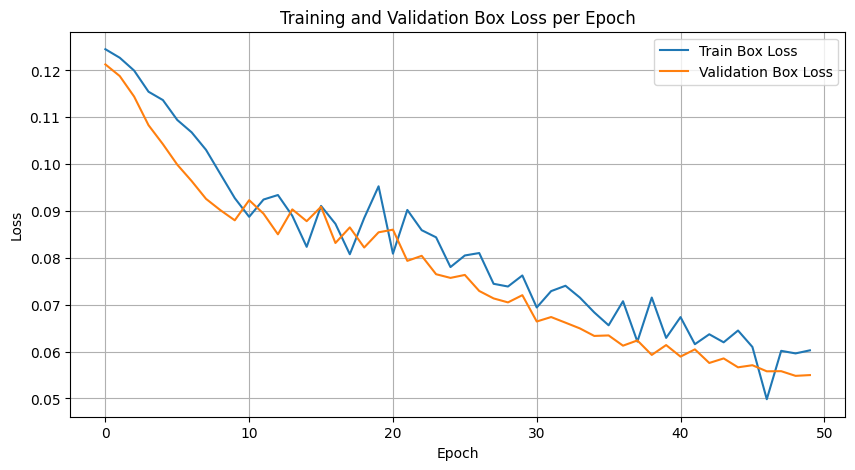

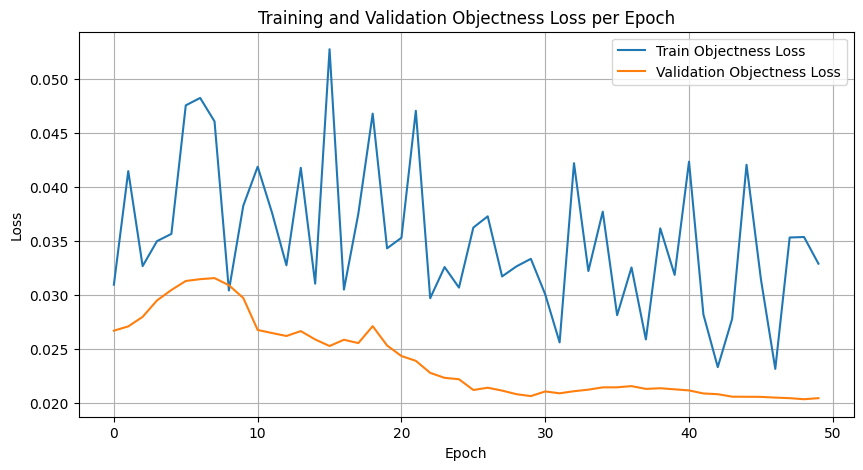

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\salaw\Documents\SChool\AI Master Winter 2024\finally\yolov5\runs\train\exp48\results.csv"
data = pd.read_csv(file_path)

# Strip extra spaces from column names
data.columns = data.columns.str.strip()

# Print cleaned column names to confirm
print(data.columns)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss')
plt.title('Training and Validation Box Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot objectness loss
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['train/obj_loss'], label='Train Objectness Loss')
plt.plot(data['epoch'], data['val/obj_loss'], label='Validation Objectness Loss')
plt.title('Training and Validation Objectness Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\salaw\Documents\SChool\AI Master Winter 2024\finally\yolov5\runs\train\exp49\results.csv"
data = pd.read_csv(file_path)

# Strip extra spaces from column names
data.columns = data.columns.str.strip()

# Print cleaned column names to confirm
print(data.columns)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss')
plt.title('Training and Validation Box Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot objectness loss
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['train/obj_loss'], label='Train Objectness Loss')
plt.plot(data['epoch'], data['val/obj_loss'], label='Validation Objectness Loss')
plt.title('Training and Validation Objectness Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
